In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({
    "text.usetex": False,
    'font.family': 'sans-serif',
    'font.serif':'Palatino Linotype',
    'font.sans-serif':'Arial',
    'font.size': 18,
    "mathtext.fontset": "stix",
    "svg.fonttype": 'none',
})

from scipy.optimize import curve_fit, minimize

In [2]:
hwp, power = np.array([
    [61, 0.124],
    [60, 0.204],
    [59, 0.322],
    [58, 0.478],
    [57, 0.671],
    [56, 0.899],
    [55, 1.161],
    [54, 1.461],
    [53, 1.792],
]).T

power

array([0.124, 0.204, 0.322, 0.478, 0.671, 0.899, 1.161, 1.461, 1.792])

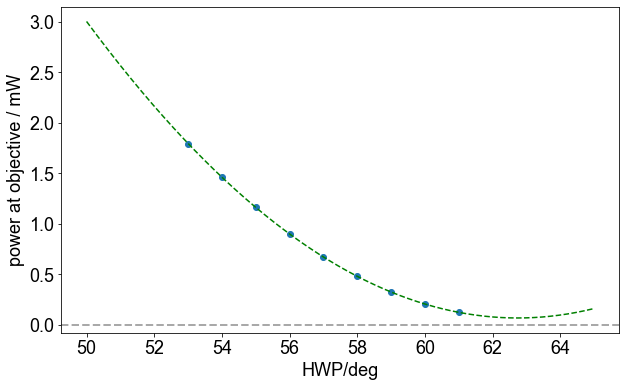

In [7]:
def power_func(x, A, x0, c):
    return( A * np.square(np.sin((x-x0)*np.pi/180))) + c

popt, pcov = curve_fit(power_func, hwp, power, p0=[10,62,0], bounds=([0, 0, -2],[np.inf, 360, 2]))

hwp_ = np.arange(50,65,0.01)

fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(hwp, power)
plt.plot(hwp_, power_func(hwp_, *popt), 'g--')
plt.axhline(color="darkgray", lw=2, linestyle="--")
plt.xlabel("HWP/deg")
plt.ylabel("power at objective / mW")

A_, x0_, c_ = tuple(popt)

In [9]:
targetpower = float(input(r"Enter target power at objective (mW):"))

if targetpower > A_ + c_:
    print("Desired power is greater than max achievable within current range.")
elif targetpower < 0:
    print("Enter a positive target power.")
else:
    min_result = minimize(lambda hwp_setting: np.abs(power_func(hwp_setting, *popt) - targetpower), 50, )
    targethwp = min_result["x"][0]
    print(f"\nUse this HWP setting: {targethwp:2.2f} deg\n\n")
    print("Minimization result:")
    print(min_result)

Enter target power at objective (mW): 1



Use this HWP setting: 55.60 deg


Minimization result:
      fun: 1.8591359562947218e-09
 hess_inv: array([[2.86735885e-08]])
      jac: array([0.0103122])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 84
      nit: 4
     njev: 36
   status: 2
  success: False
        x: array([55.59554438])
